In [1]:
import tensorflow as tf

In [5]:
import matplotlib.pyplot as plt

In [15]:
import cv2 as cv

In [18]:
import numpy as np

In [2]:
from tensorflow.keras import datasets, models, layers

In [3]:
(training_images,training_labels),(testing_images,testing_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 180s 1us/step


In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

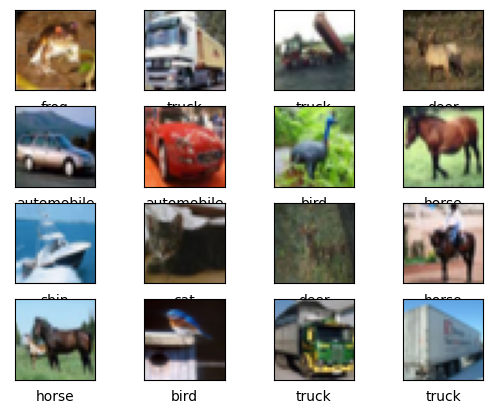

In [6]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i],cmap=plt.cm.binary)
    plt.xlabel(classes[training_labels[i][0]])
plt.show()

In [7]:
training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

In [8]:
model = models.Sequential()

In [9]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='softmax'))

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(training_images,training_labels,epochs=10, validation_data=(testing_images,testing_labels))

Epoch 1/10
625/625 [==============================] - 26s 37ms/step - loss: 2.3095 - accuracy: 0.3061 - val_loss: 1.6260 - val_accuracy: 0.4153
Epoch 2/10
625/625 [==============================] - 24s 38ms/step - loss: 1.5338 - accuracy: 0.4521 - val_loss: 1.5244 - val_accuracy: 0.4565
Epoch 3/10
625/625 [==============================] - 24s 38ms/step - loss: 1.4068 - accuracy: 0.5005 - val_loss: 1.3564 - val_accuracy: 0.5228
Epoch 4/10
625/625 [==============================] - 25s 40ms/step - loss: 1.2928 - accuracy: 0.5405 - val_loss: 1.4476 - val_accuracy: 0.4975
Epoch 5/10
625/625 [==============================] - 25s 39ms/step - loss: 1.1887 - accuracy: 0.5800 - val_loss: 1.2934 - val_accuracy: 0.5535
Epoch 6/10
625/625 [==============================] - 25s 40ms/step - loss: 1.0982 - accuracy: 0.6153 - val_loss: 1.2170 - val_accuracy: 0.5867
Epoch 7/10
625/625 [==============================] - 25s 40ms/step - loss: 1.0151 - accuracy: 0.6463 - val_loss: 1.2194 - val_accuracy:

In [12]:
loss, accuracy = model.evaluate(testing_images,testing_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

125/125 [==============================] - 1s 11ms/step - loss: 1.2690 - accuracy: 0.6080
Loss: 1.2690062522888184
Accuracy: 0.6079999804496765


In [13]:
model.save("Image_Classification.model")

INFO:tensorflow:Assets written to: Image_Classification.model\assets


INFO:tensorflow:Assets written to: Image_Classification.model\assets


In [14]:
model = models.load_model("Image_Classification.model")

In [34]:
img = cv.imread('deer.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

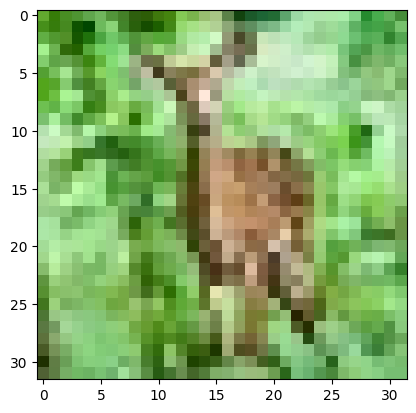

In [35]:
plt.imshow(img, cmap=plt.cm.binary)

In [36]:
prediction = model.predict(np.array([img])/255)

1/1 [==============================] - 0s 28ms/step


In [37]:
index = np.argmax(prediction)
print(f"Image class is : {classes[index]}")

Image class is : deer
